<a href="https://colab.research.google.com/github/Felipecl22/Portafolio-Ciencia-de-Datos/blob/main/K_means_y_KNN_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git --version

git version 2.45.2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el conjunto de datos Iris
iris = load_iris()

In [ ]:
# Cargar el conjunto de datos Iris
iris = load_iris()

# Convertir los datos en un DataFrame de Pandas
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Mostrar las primeras filas del DataFrame
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Examina las características: Observa las características de tus datos y revisa si están en diferentes escalas. Por ejemplo, si tienes una característica que representa la edad en años y otra característica que representa el ingreso en miles de dólares, es probable que estén en escalas diferentes.
Compara las magnitudes: Si las características están en diferentes escalas, compara las magnitudes de las características. Por ejemplo, si una característica tiene valores en el rango de 1 a 10, mientras que otra tiene valores en el rango de 1000 a 10000, es evidente que están en escalas diferentes.

In [ ]:
X = iris_df

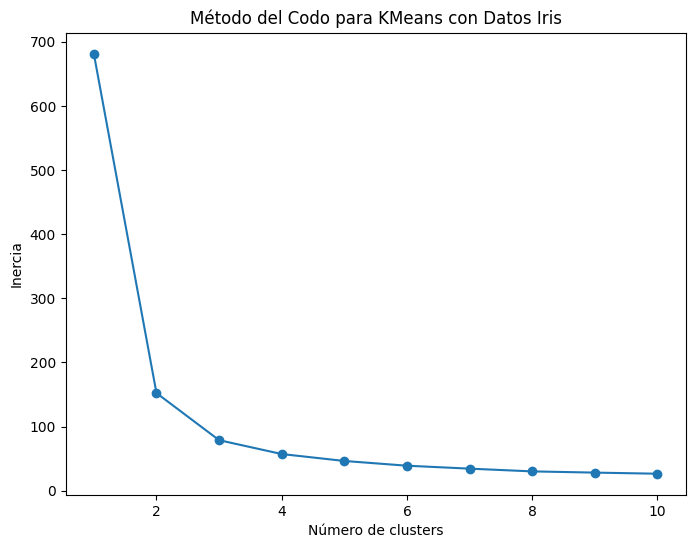

In [ ]:
# Lista para almacenar los valores de inercia (suma de las distancias cuadradas dentro del cluster)
inertia = []

# Probar diferentes números de clusters de 1 a 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para KMeans con Datos Iris')
plt.show()

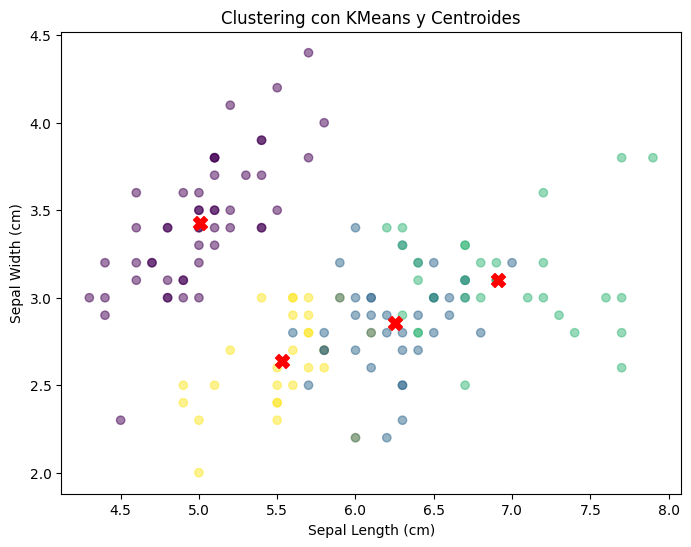

In [ ]:
# Inicializar y ajustar el modelo KMeans con 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Obtener las coordenadas de los centroides
centroides = kmeans.cluster_centers_

# Graficar los puntos de datos coloreados por cluster
plt.figure(figsize=(8, 6))
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=y_kmeans, cmap='viridis', alpha=0.5)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=100)  # Centroides
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clustering con KMeans y Centroides')
plt.show()

Exactamente, ¡así es! Aquí es donde ocurre la "magia" en tu proceso:

Utilizaste KMeans para agrupar tus datos (X) en clusters (y_kmeans) utilizando el método fit_predict(X).
Luego, dividiste tus datos en conjuntos de entrenamiento y prueba (X_train, X_test) junto con las etiquetas de cluster correspondientes (y_train, y_test) utilizando train_test_split().
Finalmente, entrenaste tu modelo KNN utilizando los datos de entrenamiento (X_train, y_train), lo que permitió que KNN aprendiera a clasificar nuevos datos en función de las etiquetas de cluster proporcionadas por KMeans.
Esta combinación de clustering (KMeans) y clasificación (KNN) es una estrategia común en el aprendizaje automático y puede ser muy efectiva para descubrir patrones en tus datos y luego utilizar esos patrones para clasificar nuevos datos.

In [ ]:
# Imprimir los centroides
print("Centroides:")
print(pd.DataFrame(centroides, columns=X.columns))


Centroides:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.006000          3.428000           1.462000          0.246000
1           6.252500          2.855000           4.815000          1.625000
2           6.912500          3.100000           5.846875          2.131250
3           5.532143          2.635714           3.960714          1.228571


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


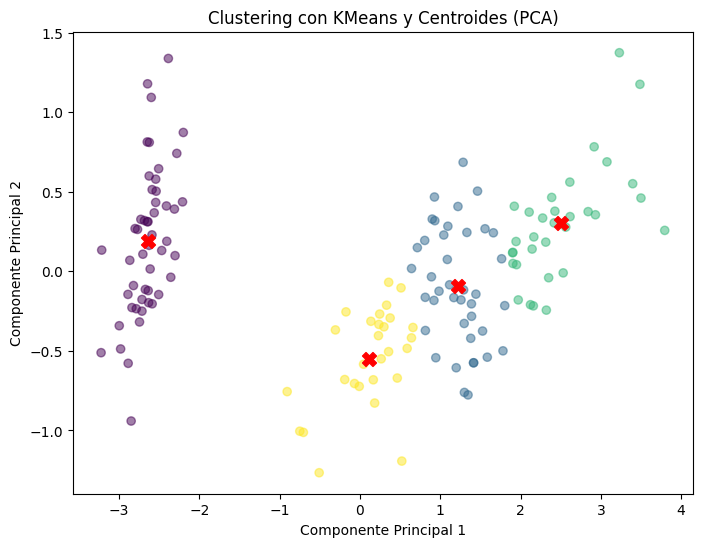

Centroides en la proyección PCA:
   Componente Principal 1  Componente Principal 2
0               -2.642415                0.190885
1                1.222982               -0.094466
2                2.506150                0.300661
3                0.107311               -0.549526


In [ ]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Graficar los puntos de datos coloreados por cluster
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', alpha=0.5)

# Graficar los centroides en la proyección PCA
centroides_pca = pca.transform(centroides)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='X', s=100)  # Centroides

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering con KMeans y Centroides (PCA)')
plt.show()

# Crear un DataFrame para los centroides en la proyección PCA
centroides_pca_df = pd.DataFrame(centroides_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

# Mostrar los centroides en la proyección PCA
print("Centroides en la proyección PCA:")
print(centroides_pca_df)


Exactamente, esos valores representan las coordenadas de los centroides en la proyección PCA. El centroide 0 está ubicado en (-2.642, 0.191) en el espacio de las dos primeras componentes principales. De manera similar, puedes interpretar la ubicación de los otros centroides utilizando las coordenadas correspondientes en la proyección PCA. Esto te proporciona información sobre dónde están ubicados cada uno de los centroides en relación con las dos primeras componentes principales de tus datos después de la reducción de dimensionalidad con PCA.

PCA: Es una técnica de reducción de dimensionalidad que busca capturar la mayor parte de la variabilidad en los datos en un número menor de dimensiones. Es útil cuando tienes muchas variables y deseas reducir la complejidad de tus datos para visualizarlos o para análisis posteriores. Sin embargo, PCA puede perder cierta información detallada sobre las relaciones entre las variables originales.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características (X) y etiquetas de clusters (y_kmeans)
X_train, X_test, y_train, y_test = train_test_split(X, y_kmeans, test_size=0.2, random_state=42)

# Inicializar y ajustar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = knn.score(X_test, y_test)
print(f'Precisión del clasificador K-NN: {accuracy:.2f}')

Precisión del clasificador K-NN: 0.97


In [ ]:
# Obtener los índices de los vecinos más cercanos para cada punto de prueba
nearest_neighbors_indices = knn.kneighbors(X_test, n_neighbors=5, return_distance=False)

# Obtener los índices de los tres vecinos más cercanos para el primer punto de prueba
primer_punto_vecinos_mas_cercanos = nearest_neighbors_indices[0]

print("Índices de los tres vecinos más cercanos para el primer punto de prueba:", primer_punto_vecinos_mas_cercanos)

Índices de los tres vecinos más cercanos para el primer punto de prueba: [79 90 39 73 80]


In [ ]:
primer_punto_prueba = iris_df.iloc[0]  # Primer punto de prueba
vecinos_cercanos = iris_df.iloc[[79, 90, 39, 73, 80]]  # Vecinos más cercanos

print("Datos del primer punto de prueba:")
print(primer_punto_prueba)

print("\nDatos de los 5 vecinos más cercanos:")
print(vecinos_cercanos)

Datos del primer punto de prueba:
sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64

Datos de los 5 vecinos más cercanos:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
79                5.7               2.6                3.5               1.0
90                5.5               2.6                4.4               1.2
39                5.1               3.4                1.5               0.2
73                6.1               2.8                4.7               1.2
80                5.5               2.4                3.8               1.1


Clasificación no supervisada: Aunque el algoritmo KMeans es una técnica de agrupación no supervisada, puede ser útil tener un método de clasificación para asignar nuevos puntos de datos (en este caso, nuevas plantas) a uno de los clusters identificados previamente. KNN puede cumplir este papel al predecir el cluster al que pertenecen los nuevos puntos de datos basándose en las características de los mismos y en los clusters identificados previamente.
Identificación de patrones similares: KNN puede ayudar a identificar patrones similares entre las nuevas plantas y las plantas ya clasificadas en los clusters, lo que puede ser útil para tareas como la identificación de especies de plantas basada en características similares.
Generalización de la clasificación: Al proporcionar un método de clasificación, KNN permite generalizar el proceso de clasificación más allá de los datos utilizados para identificar inicialmente los clusters, lo que facilita la clasificación de nuevas plantas que no estaban presentes en el conjunto de datos original.
En resumen, al implementar KNN, has habilitado un método para clasificar nuevas plantas en los clusters identificados previamente por KMeans, lo que facilita la identificación y clasificación de patrones en los datos de las plantas.

In [ ]:
# Supongamos que tienes los datos de la nueva planta
nueva_planta = [[5.8, 3.2, 4.2, 1.5]]  # Longitud del sépalo, ancho del sépalo, longitud del pétalo, ancho del pétalo

# Realiza la predicción utilizando el modelo KNN entrenado
cluster_predicho = knn.predict(nueva_planta)

# Imprime el cluster predicho
print("El cluster predicho para la nueva planta es:", cluster_predicho[0])


El cluster predicho para la nueva planta es: 3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


El modelo KNN asigna un número de cluster a cada observación en función de la distancia a sus vecinos más cercanos en el espacio de características. En este caso, cluster_predicho representa el número del cluster al que se asigna la nueva planta según el modelo KNN. Si deseas interpretar este número como una etiqueta o nombre de cluster, necesitarías mapearlo a un nombre significativo, pero eso dependería de cómo interpretes y designes los clusters en tu contexto específico.

La función knn.predict() se utiliza para predecir las etiquetas de clase (o en este caso, los clusters) para nuevos datos basados en un modelo KNN (K Nearest Neighbors) previamente entrenado.

En el contexto del código proporcionado, knn.predict(nueva_planta) predice el cluster al que pertenece una nueva planta representada por las características especificadas en nueva_planta. La predicción se realiza utilizando el modelo KNN (knn) que fue entrenado previamente con datos de entrenamiento.

En caso de tener más datos de plantas.

In [ ]:
# Supongamos que tenemos dos conjuntos de datos para predecir
nueva_planta_1 = [[5.8, 3.2, 4.2, 1.5]]  # Primer conjunto de datos
nueva_planta_2 = [[6.5, 3.0, 5.5, 1.8]]  # Segundo conjunto de datos

# Concatenar los dos conjuntos de datos en una sola lista
conjuntos_de_datos = nueva_planta_1 + nueva_planta_2

# Realizar la predicción para ambos conjuntos de datos
cluster_predicho = knn.predict(conjuntos_de_datos)

# Acceder a las predicciones correspondientes a cada conjunto de datos
prediccion_1 = cluster_predicho[0]  # Predicción para el primer conjunto de datos
prediccion_2 = cluster_predicho[1]  # Predicción para el segundo conjunto de datos

# Imprimir las predicciones
print("Predicción para el primer conjunto de datos:", prediccion_1)
print("Predicción para el segundo conjunto de datos:", prediccion_2)


Predicción para el primer conjunto de datos: 3
Predicción para el segundo conjunto de datos: 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
